In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Getting helper function

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-27 08:25:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-27 08:25:51 (48.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-06-27 08:26:01--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2023-06-27 08:26:01 (69.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### Visualizing dataset

In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
print(f"Total training samples: {len(train_df)}")
print(f"Total testing samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total testing samples: 3263
Total samples: 10876


In [11]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
import random

In [13]:
random_index = random.randint(0, len(train_df)-5)

for index in range(random_index, random_index+5):
    print(f'Target: {train_df["target"][index]}')
    print(f'Text:\n{train_df["text"][index]}')
    print("\n")

Target: 1
Text:
I just wanted to watch Paper Towns but the buildings on fire ?????


Target: 1
Text:
I hope the only time I end up on TV is when I'm being arrested for lighting buildings on fire.


Target: 1
Text:
Charred remains of homes on 2nd St in Manchester NH after fire rips through 2 buildings damaging neighboring homes http://t.co/Ja3W1S3tmr


Target: 1
Text:
Three-alarm fire destroys two residential buildings a car in Manchester N.H. on Sunday afternoon http://t.co/rVkyj3YUVK


Target: 1
Text:
1943: Poland - work party prisoners in the Nazi death camp Treblinka rebelled seizing small arms and setting buildings on fire. #history




### Spliting Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [16]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [17]:
temp = pd.DataFrame(data=train_sentences[:10], columns=["text"])
temp["target"] = train_labels[:10]
temp

,text,target
0,@mogacola @zamtriossu i screamed after hitting...,0
1,Imagine getting flattened by Kurt Zouma,0
2,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
3,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4,Somehow find you and I collide http://t.co/Ee8...,0
5,@EvaHanderek @MarleyKnysh great times until th...,1
6,destroy the free fandom honestly,1
7,Weapons stolen from National Guard Armory in N...,0
8,@wfaaweather Pete when will the heat wave pass...,1
9,Patient-reported outcomes in long-term survivo...,1


### Text vectorization (tokenization)

In [18]:
from tensorflow.keras.layers import TextVectorization

In [19]:
avg_sentence_length = round(sum([len(sentence.split()) for sentence in train_sentences]) / len(train_sentences))
avg_sentence_length

15

In [20]:
# this method's every parameter is set by default, what we need. Just need to change below two params.
text_vectorizer = TextVectorization(max_tokens=10000,
                                    output_sequence_length=avg_sentence_length)

In [21]:
text_vectorizer.adapt(train_sentences)

In [22]:
import random

In [23]:
random_sentence = random.choice(train_sentences)
print(f"Before tokenization: {random_sentence}")
print(f"After tokenization: {text_vectorizer([random_sentence])}")

Before tokenization: who makes these? http://t.co/28t3NWHdKy
After tokenization: [[ 65 738 222   1   0   0   0   0   0   0   0   0   0   0   0]]


In [24]:
print(f"5 most common words: {text_vectorizer.get_vocabulary()[:5]}")
print(f"5 least common words: {text_vectorizer.get_vocabulary()[-5:]}")

5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Embedding

In [25]:
from tensorflow.keras.layers import Embedding

In [26]:
embedding = Embedding(input_dim=len(text_vectorizer.get_vocabulary()),
                      output_dim=128,
                      input_length=avg_sentence_length)

In [27]:
random_sentence = random.choice(train_sentences)
print(f"Sentence before embedding: {random_sentence}")
embedding(text_vectorizer([random_sentence]))

Sentence before embedding: RT THR 'RT THRArchives: 1928: When Leo the MGM Lion Survived a Plane Crash #TBT http://t.co/Wpkl2qNiQW http://t.co/BD52FxDvhQ'


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-4.0851749e-02,  7.6949485e-03,  1.3317201e-02, ...,
          1.0526668e-02, -4.4421971e-02, -1.0895897e-02],
        [ 5.0556883e-03, -4.7446083e-02,  2.3463871e-02, ...,
          3.7456665e-02, -2.4086321e-02,  1.3350025e-03],
        [-4.0851749e-02,  7.6949485e-03,  1.3317201e-02, ...,
          1.0526668e-02, -4.4421971e-02, -1.0895897e-02],
        ...,
        [-1.1376657e-02, -2.6671816e-02, -9.3806535e-05, ...,
         -2.2146691e-02, -2.6890123e-02,  3.7125234e-02],
        [-4.7010042e-02,  2.0855952e-02,  5.9327595e-03, ...,
         -3.7330128e-02, -3.6888648e-02, -1.7816890e-02],
        [ 2.4393212e-02,  4.0835850e-03,  3.5560105e-02, ...,
         -8.8322982e-03, -3.2545112e-02, -7.0614703e-03]]], dtype=float32)>

**Note:** If we see the shape of the embedded sentence, we will notice it is (1, 15, 128)<br>
which means from every sentence we will take 15 words and each word will be represented with 128 shape matrix.

### `model_0`: Baseline

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [29]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("multinomial", MultinomialNB())
])

In [30]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('multinomial', MultinomialNB())])

### Evaluation function

In [31]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [32]:
def calculate_results(y_true, y_pred):
    """
    returns a dictionary of accuracy_score, precission, recall and f1_score
    """
    precission, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    acc_score = accuracy_score(y_true, y_pred) * 100
    
    results = {
        "accuracy_score": acc_score,
        "precission": precission,
        "recall": recall,
        "f1_score": f1_score
    }
    return results

In [33]:
baseline_results = calculate_results(val_labels, model_0.predict(val_sentences))
baseline_results

{'accuracy_score': 79.26509186351706,
 'precission': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

### `model_1`: Simple dense model

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

In [35]:
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GlobalAveragePooling1D()(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [36]:
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [37]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [38]:
SAVE_DIR = "model_logs"

In [39]:
history_1 = model_1.fit(train_sentences, 
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                               experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230627-082606
Epoch 1/5
215/215 [==============================] - 18s 68ms/step - loss: 0.6333 - accuracy: 0.6516 - val_loss: 0.5694 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4678 - accuracy: 0.8221 - val_loss: 0.4775 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3431 - accuracy: 0.8739 - val_loss: 0.4571 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2601 - accuracy: 0.9076 - val_loss: 0.4573 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1996 - accuracy: 0.9336 - val_loss: 0.4681 - val_accuracy: 0.7887


In [40]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.4108663 ],
       [0.8388542 ],
       [0.9928773 ],
       [0.08097652],
       [0.26630762],
       [0.9591503 ],
       [0.9065185 ],
       [0.98617446],
       [0.93993247],
       [0.18122266]], dtype=float32)

In [41]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [42]:
model_1_result = calculate_results(y_true=val_labels,
                                 y_pred=model_1_preds)
model_1_result

{'accuracy_score': 78.87139107611549,
 'precission': 0.7909484312997928,
 'recall': 0.7887139107611548,
 'f1_score': 0.7867378765635805}

### `model_2`: LSTM

In [43]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(units=64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [44]:
model_2.compile(loss="binary_crossentropy", 
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [45]:
history_2 = model_2.fit(train_sentences,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                              "LSTM_model")])

Saving TensorBoard log files to: model_logs/LSTM_model/20230627-082648
Epoch 1/5
215/215 [==============================] - 21s 65ms/step - loss: 0.3698 - accuracy: 0.8332 - val_loss: 0.4804 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2481 - accuracy: 0.9009 - val_loss: 0.5012 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1732 - accuracy: 0.9343 - val_loss: 0.5651 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1295 - accuracy: 0.9530 - val_loss: 0.8749 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0938 - accuracy: 0.9637 - val_loss: 1.0415 - val_accuracy: 0.7743


In [46]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10] 

24/24 [==============================] - 1s 4ms/step


array([[0.03233492],
       [0.5902553 ],
       [0.99993896],
       [0.04649394],
       [0.0022359 ],
       [0.99995995],
       [0.9634777 ],
       [0.9999629 ],
       [0.9999553 ],
       [0.32312337]], dtype=float32)

In [47]:
model_2_pred = tf.squeeze(tf.round(model_1_pred_probs))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [48]:
model_2_result = calculate_results(y_true=val_labels,
                                  y_pred=model_2_pred)
model_2_result

{'accuracy_score': 78.87139107611549,
 'precission': 0.7909484312997928,
 'recall': 0.7887139107611548,
 'f1_score': 0.7867378765635805}

In [49]:
baseline_results

{'accuracy_score': 79.26509186351706,
 'precission': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

### `model_3': GRU

In [50]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.GRU(units=64, return_sequences=True)(x)
# print(x.shape)
x = layers.GRU(units=64)(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="GRU_model")

In [51]:
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [52]:
history_3 = model_3.fit(train_sentences,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                             "GRU_model")])

Saving TensorBoard log files to: model_logs/GRU_model/20230627-082736
Epoch 1/5
215/215 [==============================] - 16s 55ms/step - loss: 0.1759 - accuracy: 0.9301 - val_loss: 0.7300 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0918 - accuracy: 0.9682 - val_loss: 0.8480 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0667 - accuracy: 0.9739 - val_loss: 1.1873 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0602 - accuracy: 0.9752 - val_loss: 0.9726 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0515 - accuracy: 0.9771 - val_loss: 1.1479 - val_accuracy: 0.7703


In [53]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:5]

24/24 [==============================] - 1s 4ms/step


array([[1.7296927e-03],
       [7.2542065e-01],
       [9.9964154e-01],
       [2.8285253e-01],
       [2.8391773e-04]], dtype=float32)

In [54]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [55]:
model_3_result = calculate_results(y_true=val_labels,
                                  y_pred=model_3_pred)
model_3_result

{'accuracy_score': 77.03412073490814,
 'precission': 0.7718252603398367,
 'recall': 0.7703412073490814,
 'f1_score': 0.7683227325217538}

### `model_4`: Bidirectional

In [56]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
# x = layers.Bidirectional(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="bidirectional_model")

(None, 15, 128)
(None, 128)
(None, 128)


In [57]:
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [58]:
history_4 = model_4.fit(train_sentences,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                             "bidirectional_model")])

Saving TensorBoard log files to: model_logs/bidirectional_model/20230627-082822
Epoch 1/5
215/215 [==============================] - 22s 61ms/step - loss: 0.1320 - accuracy: 0.9477 - val_loss: 0.9397 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0614 - accuracy: 0.9734 - val_loss: 1.0086 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0517 - accuracy: 0.9765 - val_loss: 1.3512 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0465 - accuracy: 0.9784 - val_loss: 1.5507 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0427 - accuracy: 0.9801 - val_loss: 1.4180 - val_accuracy: 0.7651


In [59]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:5]

24/24 [==============================] - 1s 8ms/step


array([[1.2203825e-04],
       [6.0414320e-01],
       [9.9924928e-01],
       [7.7935751e-03],
       [4.7032379e-05]], dtype=float32)

In [60]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [61]:
model_4_result = calculate_results(val_labels, model_4_pred)
model_4_result

{'accuracy_score': 76.50918635170603,
 'precission': 0.7669456967235844,
 'recall': 0.7650918635170604,
 'f1_score': 0.7627590065822708}

### `model_5`: Convolutional network

In [62]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
print(x.shape)
x = layers.GlobalMaxPool1D()(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

(None, 15, 128)
(None, 11, 32)
(None, 32)


In [63]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [64]:
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [65]:
history_5 = model_5.fit(train_sentences,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                             "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20230627-082911
Epoch 1/5
215/215 [==============================] - 15s 49ms/step - loss: 0.1821 - accuracy: 0.9467 - val_loss: 0.7609 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0828 - accuracy: 0.9710 - val_loss: 0.9003 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0639 - accuracy: 0.9772 - val_loss: 0.9963 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0584 - accuracy: 0.9772 - val_loss: 1.0468 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0521 - accuracy: 0.9784 - val_loss: 1.0861 - val_accuracy: 0.7415


In [66]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5]

24/24 [==============================] - 0s 3ms/step


array([[3.3803293e-01],
       [9.4959378e-01],
       [9.9990988e-01],
       [9.1895662e-02],
       [5.9357876e-06]], dtype=float32)

In [67]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [68]:
model_5_result = calculate_results(val_labels, model_5_pred)
model_5_result

{'accuracy_score': 74.1469816272966,
 'precission': 0.740987599222162,
 'recall': 0.7414698162729659,
 'f1_score': 0.740545789673564}

### `model_6`: Transfer learning

In [69]:
import tensorflow_hub as hub

In [70]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
#                                         input_shape=[],
#                                         dtype="string"
                                       )

In [71]:
# outputs =  layers.Dense(1, activation="sigmoid")(sentence_encoder_layer)
# model_6 = tf.keras.Model(sentence_encoder_layer, outputs)

In [72]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [73]:
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [74]:
history_6 = model_6.fit(train_sentences,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                             "transfer_learning")])

Saving TensorBoard log files to: model_logs/transfer_learning/20230627-082954
Epoch 1/5
215/215 [==============================] - 9s 20ms/step - loss: 0.5014 - accuracy: 0.7824 - val_loss: 0.4495 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4144 - accuracy: 0.8140 - val_loss: 0.4403 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4016 - accuracy: 0.8235 - val_loss: 0.4327 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3936 - accuracy: 0.8263 - val_loss: 0.4405 - val_accuracy: 0.8045
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3866 - accuracy: 0.8291 - val_loss: 0.4284 - val_accuracy: 0.8189


In [75]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [76]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:5]

24/24 [==============================] - 1s 10ms/step


array([[0.15414958],
       [0.7401558 ],
       [0.98367786],
       [0.20427704],
       [0.7122293 ]], dtype=float32)

In [77]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [78]:
model_6_result = calculate_results(val_labels, model_6_pred)
model_6_result

{'accuracy_score': 81.88976377952756,
 'precission': 0.8214432106294689,
 'recall': 0.8188976377952756,
 'f1_score': 0.8173559181868181}

In [79]:
model_1_result

{'accuracy_score': 78.87139107611549,
 'precission': 0.7909484312997928,
 'recall': 0.7887139107611548,
 'f1_score': 0.7867378765635805}

### `model_7`: Transfer learning with 10% data

In [80]:
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [81]:
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, 
#                                                                 random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()


In [82]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [83]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [84]:
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [85]:
history_7 = model_7.fit(train_sentences_10_percent,
                       train_labels_10_percent,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                             "transfer_learning_10%_data")])

Saving TensorBoard log files to: model_logs/transfer_learning_10%_data/20230627-083019
Epoch 1/5
22/22 [==============================] - 3s 53ms/step - loss: 0.6673 - accuracy: 0.6647 - val_loss: 0.6438 - val_accuracy: 0.7205
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5876 - accuracy: 0.8251 - val_loss: 0.5838 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5095 - accuracy: 0.8309 - val_loss: 0.5330 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 30ms/step - loss: 0.4482 - accuracy: 0.8280 - val_loss: 0.5029 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 29ms/step - loss: 0.4080 - accuracy: 0.8382 - val_loss: 0.4919 - val_accuracy: 0.7756


In [86]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:5]

24/24 [==============================] - 1s 11ms/step


array([[0.22421952],
       [0.8066695 ],
       [0.90080416],
       [0.32568508],
       [0.52892226]], dtype=float32)

In [87]:
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [88]:
model_7_result = calculate_results(val_labels, model_7_pred)
model_7_result

{'accuracy_score': 77.55905511811024,
 'precission': 0.7815353725945549,
 'recall': 0.7755905511811023,
 'f1_score': 0.7718737954958428}

In [89]:
model_1_result

{'accuracy_score': 78.87139107611549,
 'precission': 0.7909484312997928,
 'recall': 0.7887139107611548,
 'f1_score': 0.7867378765635805}

### Comparing performance of each of the model

In [107]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                "simple_dense": model_1_result,
                                "lstm": model_2_result,
                                "gru": model_3_result,
                                "bidirectional": model_4_result,
                                "conv1D": model_5_result,
                                "tf_hub_sentence_encoder": model_6_result,
                                "tf_hub_10_percent": model_7_result})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy_score,precission,recall,f1_score
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.871391,0.790948,0.788714,0.786738
lstm,78.871391,0.790948,0.788714,0.786738
gru,77.034121,0.771825,0.770341,0.768323
bidirectional,76.509186,0.766946,0.765092,0.762759
conv1D,74.146982,0.740988,0.741470,0.740546
tf_hub_sentence_encoder,81.889764,0.821443,0.818898,0.817356
tf_hub_10_percent,77.559055,0.781535,0.775591,0.771874


In [108]:
all_model_results["accuracy_score"] = all_model_results["accuracy_score"]/100

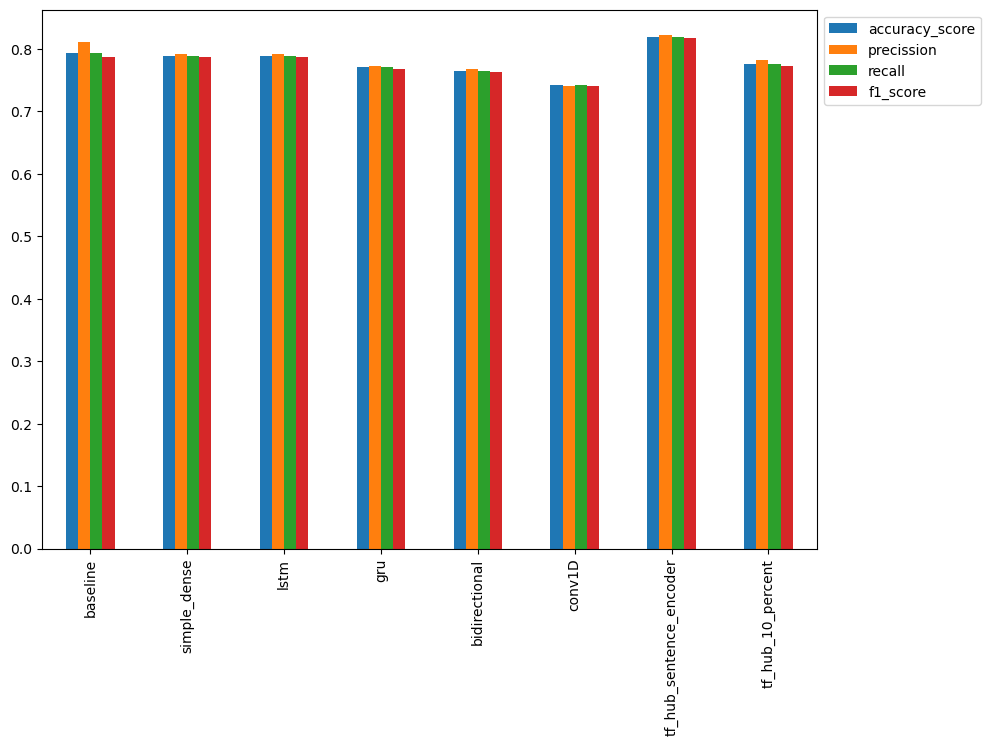

In [109]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

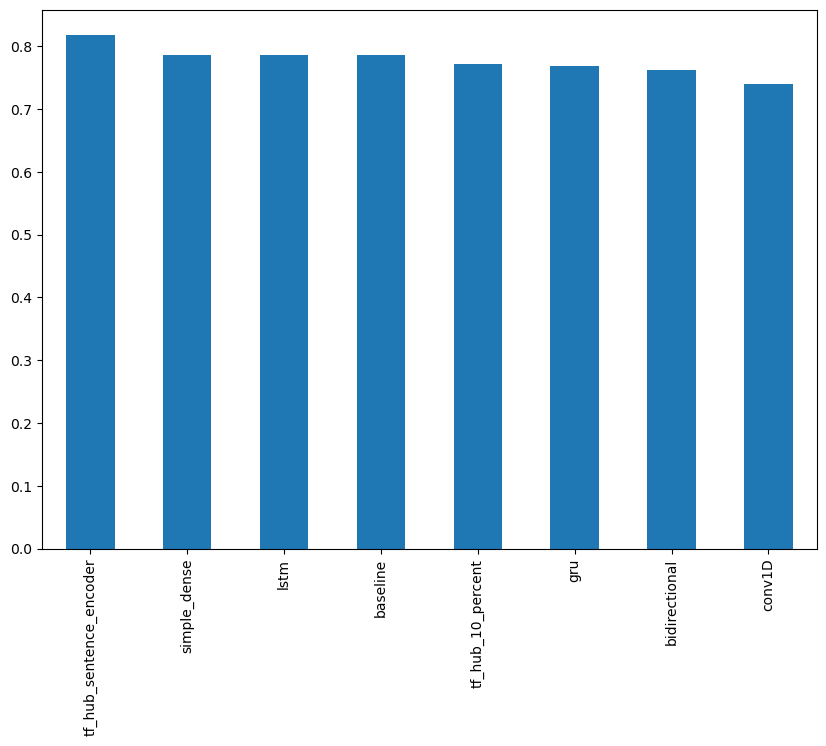

In [110]:
all_model_results.sort_values("f1_score", ascending=False)["f1_score"].plot(kind="bar", figsize=(10, 7));